In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
import utils

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
# Reshape x_train to 2D (flatten each 28x28 image into a 784-length vector)
X = x_train.reshape(x_train.shape[0], -1)
X = X.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

X = X[:2000]
y_train = y_train[:2000]

# PCA

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [26]:
df_pca2d, pca2d = utils.perform_pca(X, y_train, "Digit", n_components=2)

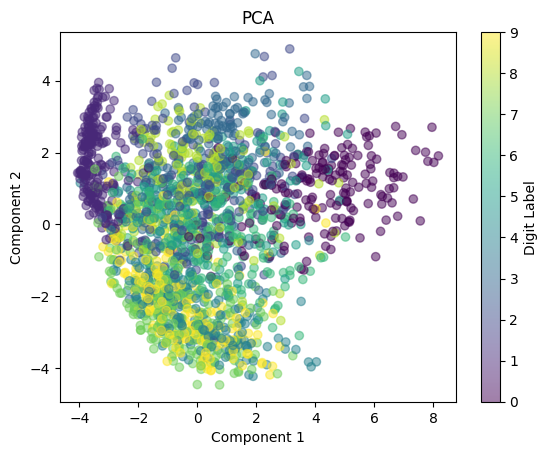

In [27]:
plt.title("PCA")
plt.scatter(df_pca2d["principal component 1"], df_pca2d["principal component 2"], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Digit Label")
plt.show()

In [28]:
utils.print_pca_exp_variance(pca2d)

Expplained variance ratio
[0.10009535 0.0746062 ]

Total explained variance
17.47%


In [29]:
thresholds = [0.85, 0.90, 0.95, 0.99]

In [30]:
pca = PCA().fit(X)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

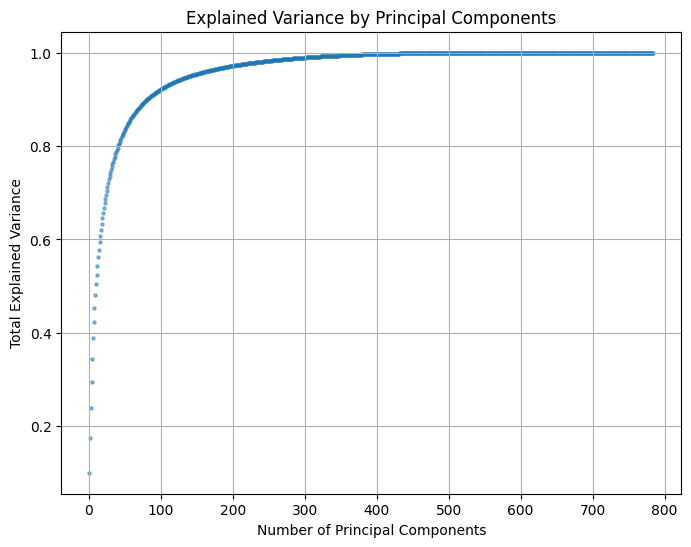

In [31]:
plt.figure(figsize=(8,6))
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Explained Variance')
plt.grid()
plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, alpha=0.5, s=5)

In [32]:
components_needed = []
for threshold in thresholds:
    components_needed.append(np.argmax(cumulative_explained_variance >= threshold) + 1)
print("Number of components needed to explain 85% variance:", components_needed[0])
print("Number of components needed to explain 90% variance:", components_needed[1])
print("Number of components needed to explain 95% variance:", components_needed[2])
print("Number of components needed to explain 99% variance:", components_needed[3])

Number of components needed to explain 85% variance: 56
Number of components needed to explain 90% variance: 82
Number of components needed to explain 95% variance: 141
Number of components needed to explain 99% variance: 304


# KPCA

In [57]:
kpca = KernelPCA(kernel="poly", gamma=3, n_components=2)
X_kpca = kpca.fit_transform(X)

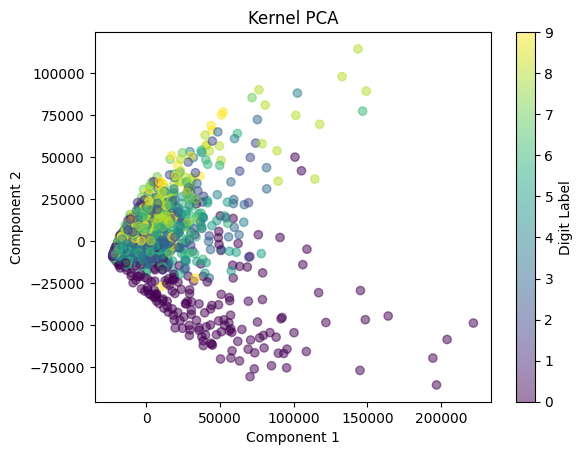

In [56]:
plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Digit Label")
plt.show()

In [35]:
ratios = kpca.eigenvalues_ / kpca.eigenvalues_.sum()
print("Estimated explained variance ratios:", ratios)

Estimated explained variance ratios: [0.53542227 0.46457773]


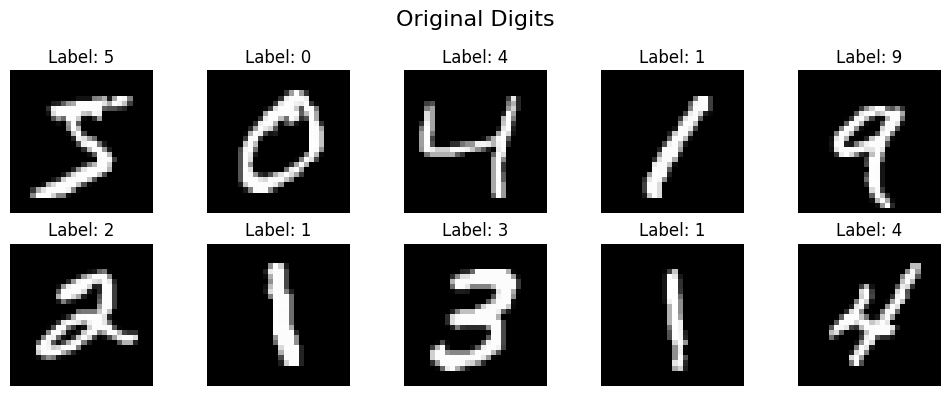

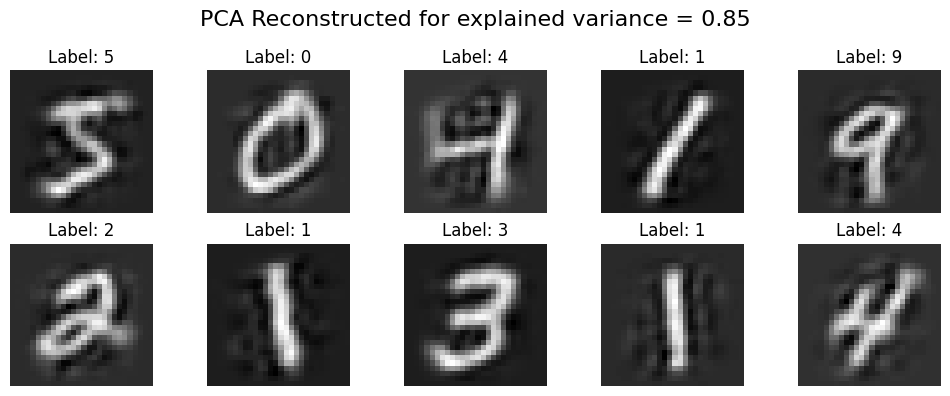

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=1.41325e-13): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=1.41325e-13): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)


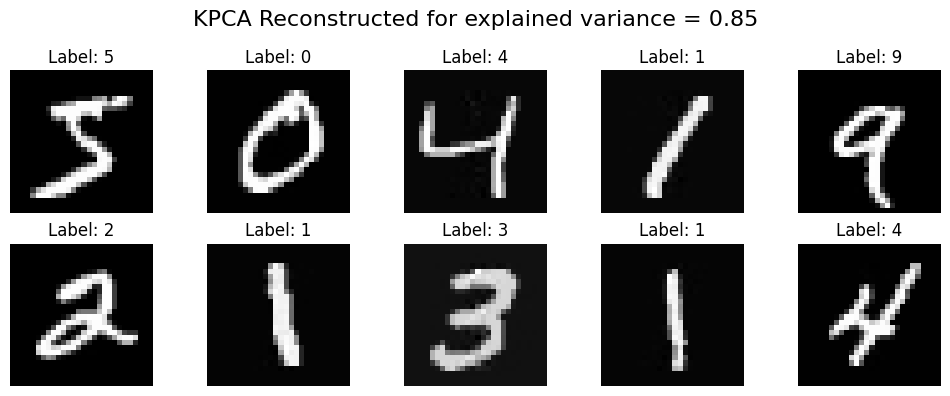

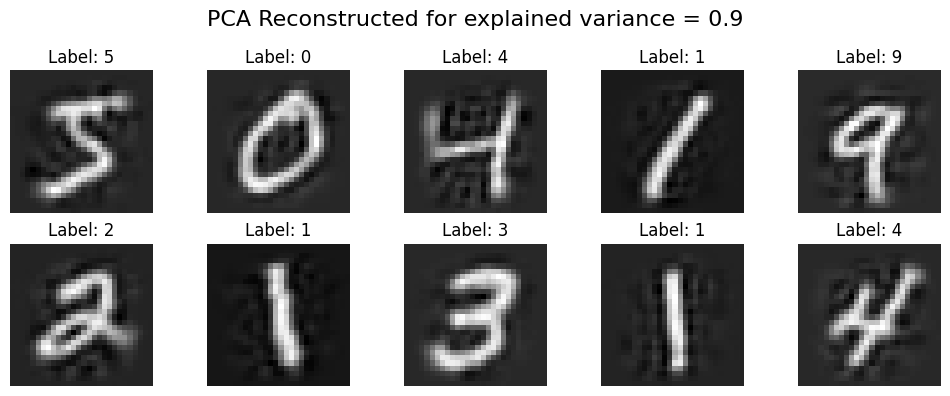

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=1.27992e-12): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=1.27992e-12): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)


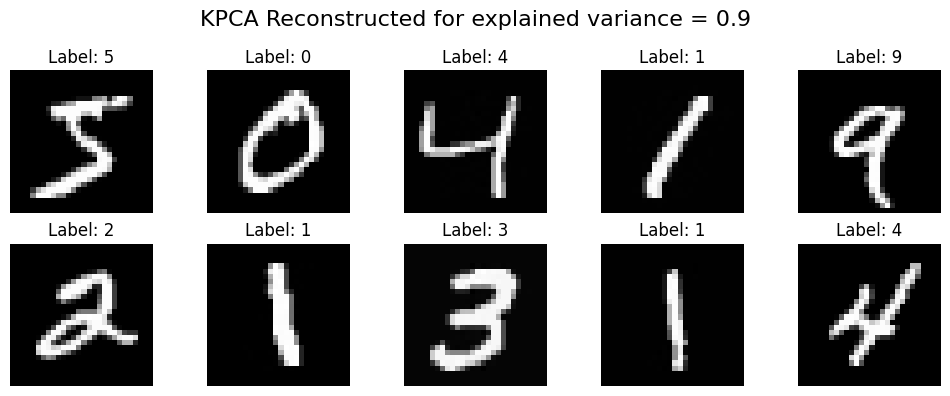

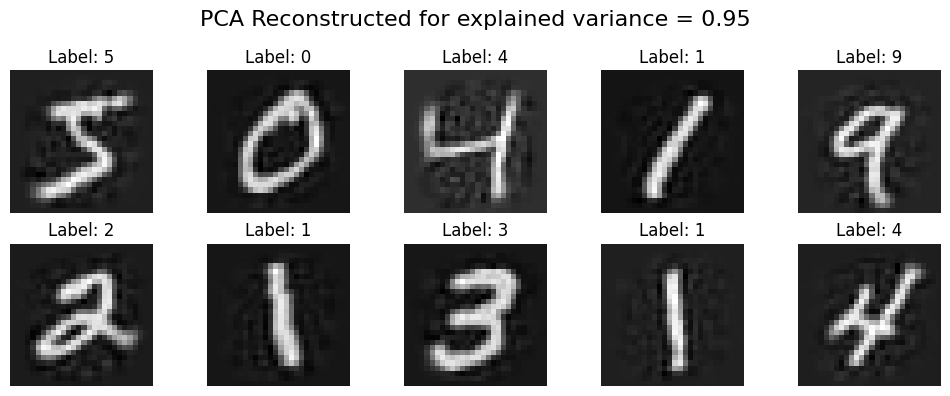

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=6.44542e-12): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=6.44542e-12): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)


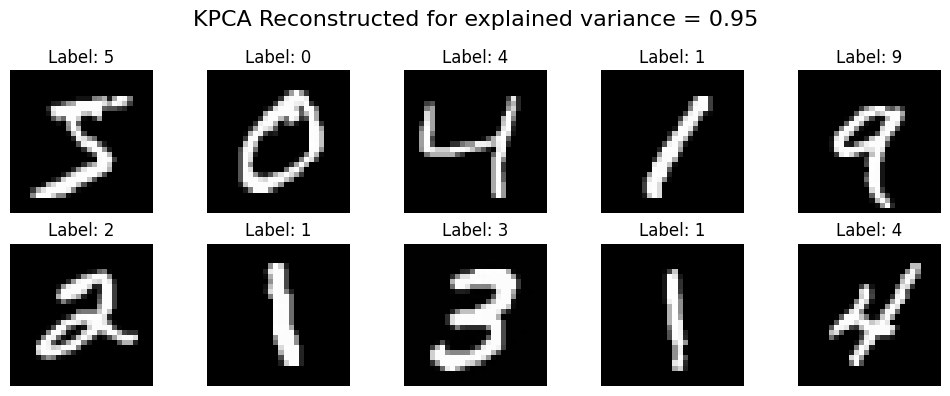

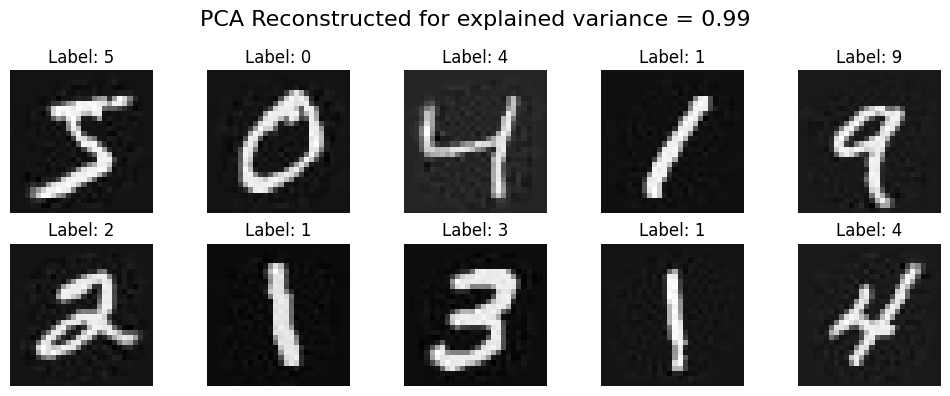

c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=3.43312e-11): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
c:\Users\Ignacy\Desktop\programowanie\Studia\sem6\AI_1\.venv\Lib\site-packages\sklearn\decomposition\_kernel_pca.py:415: LinAlgWarning: Ill-conditioned matrix (rcond=3.43312e-11): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)


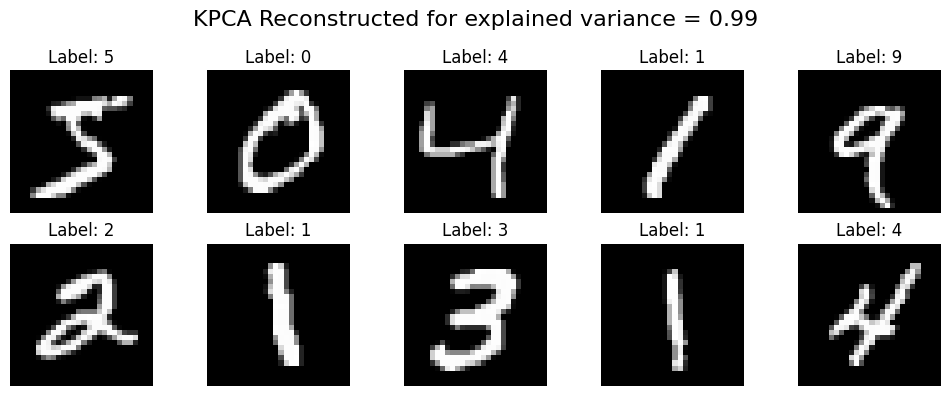

In [67]:
def draw_digits(X, y, title, n_row=2, n_col=5):
    fig, axes = plt.subplots(n_row, n_col, figsize=(n_col * 2, n_row * 2))
    fig.suptitle(title, fontsize=16)
    for i in range(n_row * n_col):
        ax = axes[i // n_col, i % n_col]
        ax.imshow(X[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {y[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Draw original images
draw_digits(x_train, y_train, 'Original Digits', n_row=2, n_col=5)

for i, cn in enumerate(components_needed):
    # Draw PCA reconstructed images
    pca = PCA(n_components=cn)
    X_pca = pca.fit_transform(X)
    X_pca_inverse = pca.inverse_transform(X_pca)
    draw_digits(X_pca_inverse, y_train, f'PCA Reconstructed for explained variance = {thresholds[i]}', n_row=2, n_col=5)

    # Draw Kernel PCA reconstructed images
    kpca = KernelPCA(kernel="poly", gamma=3, n_components=cn, fit_inverse_transform =True)
    X_kpca = kpca.fit_transform(X)
    X_kpca_inverse = kpca.inverse_transform(X_kpca)
    draw_digits(X_kpca_inverse, y_train, f'KPCA Reconstructed for explained variance = {thresholds[i]}', n_row=2, n_col=5)
